In [ ]:
import pandas as pd

clinical_df = pd.read_csv("AllSubjects.csv")

clinical_df = clinical_df.dropna(subset=['DIAGNOSIS'])

clinical_df['DIAGNOSIS'] = clinical_df['DIAGNOSIS'] - 1
clinical_df1 = pd.read_csv("Mapped_Clinical_Dataset.csv")
clinical_df = pd.concat([clinical_df, clinical_df1], ignore_index=True)


In [ ]:
# Define the columns you care about (all the ones you listed)
columns_to_keep = [
    "subject_id",  "MMSCORE",
    "FAQFINAN", "FAQFORM", "FAQSHOP", "FAQGAME", "FAQBEVG", "FAQMEAL",
    "FAQEVENT", "FAQTV", "FAQREM", "FAQTRAVL", "FAQTOTAL",
    "PTGENDER", "subject_age", 'DIAGNOSIS', 'CDGLOBAL'
]
import pandas as pd

clinical_df = clinical_df.drop(['visit'], axis=1)

clean_df = clinical_df.dropna(subset=columns_to_keep)
def simplify_faq_response(x):
    if x in [0, 1]:
        return 0 
    elif x in [2, 3]:
        return 1  
    else:
        return 2 

faq_columns = ["FAQFINAN", "FAQFORM", "FAQGAME", "FAQBEVG", "FAQMEAL", "FAQTV", "FAQREM"]
for col in faq_columns:
    clean_df[col] = clean_df[col].apply(simplify_faq_response)

C:\Users\casap\AppData\Local\Temp\ipykernel_36140\2663925887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].apply(simplify_faq_response)


In [3]:
print("Original rows:", clinical_df.shape[0])
print("After cleaning:", clean_df.shape[0])


Original rows: 17350
After cleaning: 11393


In [4]:
clean_df.to_csv("clean_clinical_data.csv", index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv("clean_clinical_data.csv")

features = [

    "FAQFINAN", "FAQFORM", "FAQGAME", "FAQBEVG", "FAQMEAL",
     "FAQTV", "FAQREM",  "PTGENDER", "subject_age", "DIAGNOSIS"

]
X = df[features]
y = df["MMSCORE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

print("Best model params:")
print(model.get_booster().attributes())

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid,
                    scoring='neg_root_mean_squared_error', cv=3, verbose=1)
grid.fit(X_train, y_train)

print("Best RMSE Score:", -grid.best_score_)
print("Best Params:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test RMSE (best model):", mean_squared_error(y_test, y_pred, squared=False))

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f} ({r2 * 100:.1f}%)")


MAE: 2.0616723990786876
RMSE: 2.970608165558109
Best model params:
{}
Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\casap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best RMSE Score: 3.142280185546227
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Test RMSE (best model): 2.9305512049813855
R² Score: 0.812 (81.2%)


C:\Users\casap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid,
                    scoring='neg_root_mean_squared_error', cv=3, verbose=1)
grid.fit(X_train, y_train)

print("Best RMSE Score:", -grid.best_score_)
print("Best Params:", grid.best_params_)

# Evaluate final model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test RMSE (best model):", mean_squared_error(y_test, y_pred, squared=False))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best RMSE Score: 3.142280185546227
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Test RMSE (best model): 2.9305512049813855


C:\Users\casap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f} ({r2 * 100:.1f}%)")


R² Score: 0.812 (81.2%)


In [27]:
import joblib

# Save best model from grid search
joblib.dump(best_model, "best_xgb_model.joblib")


['best_xgb_model.joblib']

 96%|=================== | 10982/11393 [00:22<00:00]       

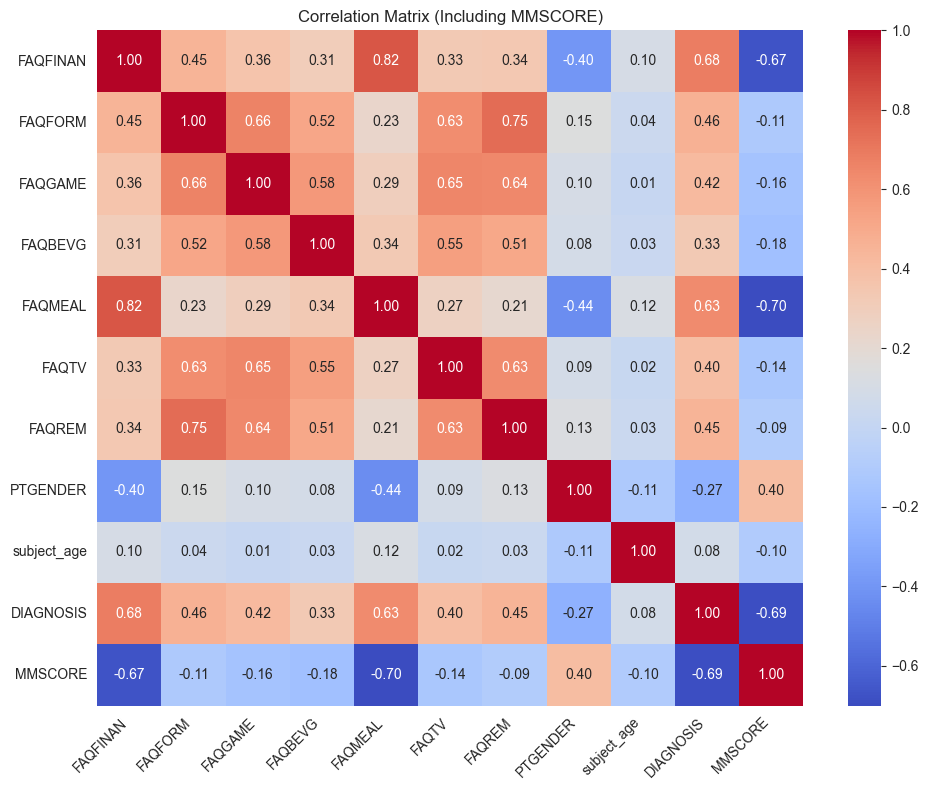

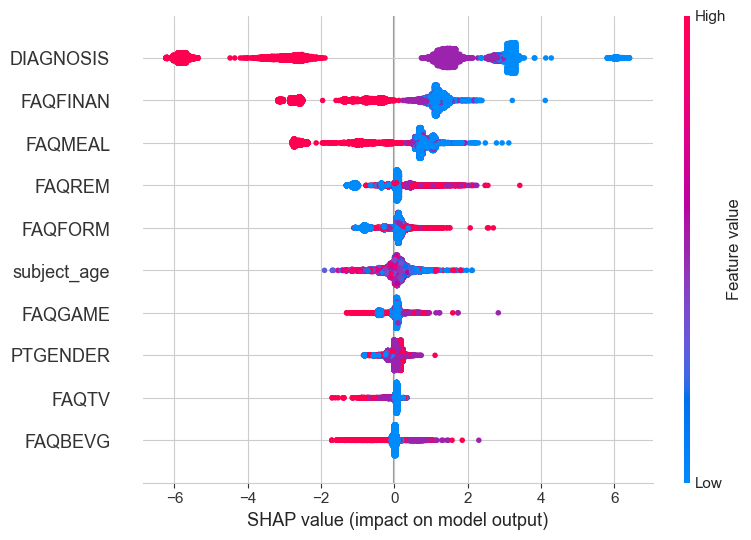

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import joblib


model = joblib.load("best_xgb_model.joblib")
features = [
    "FAQFINAN", "FAQFORM", "FAQGAME", "FAQBEVG", "FAQMEAL",
    "FAQTV", "FAQREM", "PTGENDER", "subject_age", "DIAGNOSIS"
]
target = "MMSCORE"
X = df[features]
y = df[target]

correlation_df = df[features + [target]].corr()

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Including MMSCORE)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values, X)

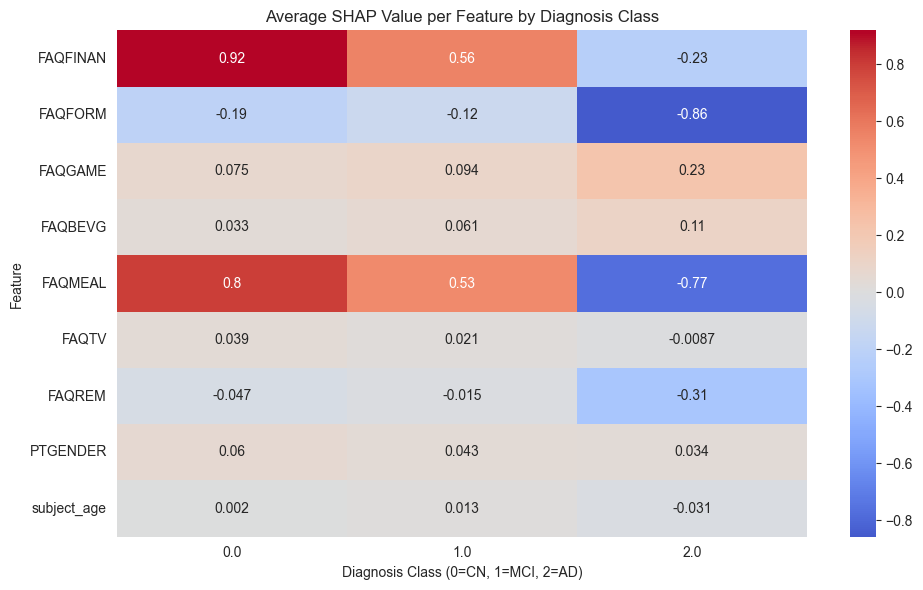

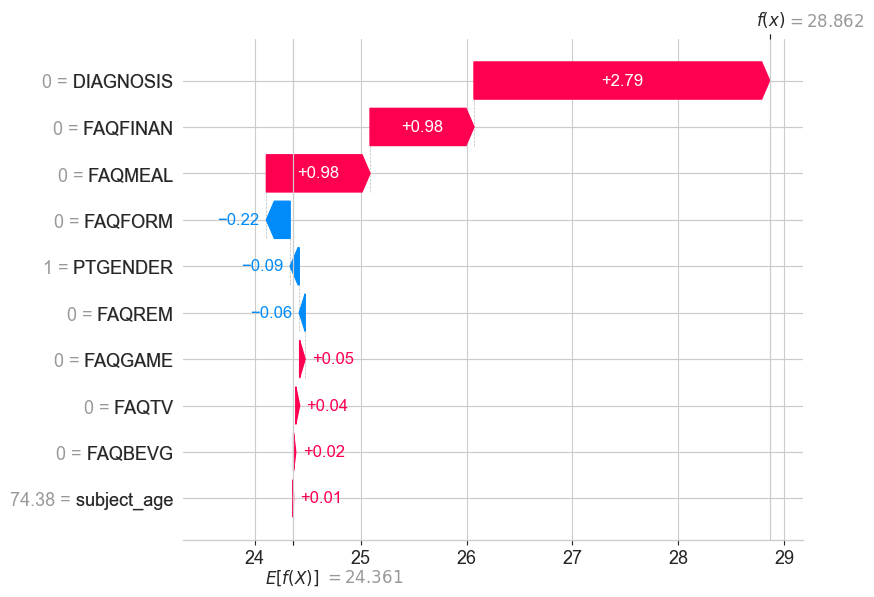

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_clinical_data.csv")

features = [
    "FAQFINAN", "FAQFORM", "FAQGAME", "FAQBEVG", "FAQMEAL",
    "FAQTV", "FAQREM", "PTGENDER", "subject_age", "DIAGNOSIS"
]

X = df[features]
y = df["MMSCORE"]
diagnosis_labels = df["DIAGNOSIS"]

import joblib
xgb_model = joblib.load("best_xgb_model.joblib")

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

shap_df = pd.DataFrame(shap_values.values, columns=features)
shap_df["DIAGNOSIS"] = diagnosis_labels

grouped_shap = shap_df.groupby("DIAGNOSIS").mean().T

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_shap, annot=True, cmap="coolwarm", center=0)
plt.title("Average SHAP Value per Feature by Diagnosis Class")
plt.xlabel("Diagnosis Class (0=CN, 1=MCI, 2=AD)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

shap.plots.waterfall(shap_values[0], max_display=10)


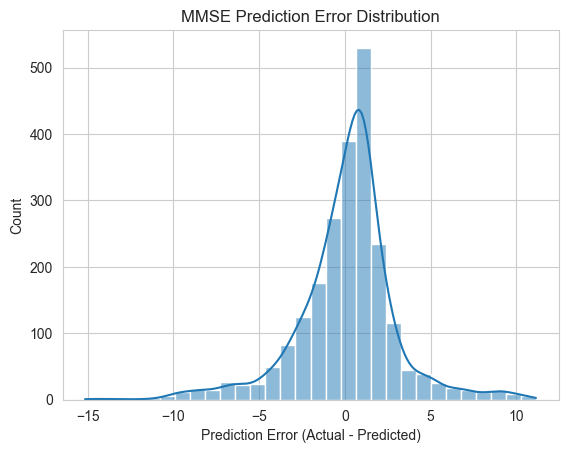

In [32]:
errors = y_test - y_pred
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.title("MMSE Prediction Error Distribution")
plt.show()
